In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from math import ceil

In [20]:
df=pd.read_csv(r'MultiVarLR.csv',header=None)

# The Adam Implemention (Batch Version) algorithm to train a multivariable linear regression model.



In [21]:
df.head()

,0,1,2,3
0,73.0,80.0,75.0,152.0
1,93.0,88.0,93.0,185.0
2,89.0,91.0,90.0,180.0
3,96.0,98.0,100.0,196.0
4,73.0,66.0,70.0,142.0


In [22]:
df.shape

(25, 4)

In [23]:
m=df.shape[0]
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [24]:
X=np.hstack([np.ones((m,1)),X])
w=np.zeros(X.shape[1]).reshape(X.shape[1],1)

In [25]:
def Hypothesis(X,w):
    H=  X @ w 
    return H


In [26]:
def compute_cost(X,y,w,Hypothesis):
    j= ( 1 / (2*m) ) * np.sum ((Hypothesis(X,w) - y )**2)
    return j, (Hypothesis(X,w) - y) 

In [27]:
def plot(x,y,xname,yname,mark):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.plot(x,y,marker=mark,color='m')
    plt.ylabel(yname, fontsize=15)
    plt.xlabel(xname, fontsize=15)
    plt.show()
    
    
def plot_all_reg(x,y,y_hat_hist,xname,yname,mark):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.scatter(x,y)
    for i in range(len(y_hat_hist)):
        plt.plot(x,y_hat_hist[i],color='r')

    plt.ylabel(yname, fontsize=15)
    plt.xlabel(xname, fontsize=15)
    plt.show()
    
def best_fit_line(x,y,y_hat,xname,yname,mark):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.scatter(x,y)
    plt.plot(x,y_hat,marker=mark,color='r')
    plt.ylabel(yname, fontsize=15)
    plt.xlabel(xname, fontsize=15)
    plt.show()



In [28]:
def ADAM_MB_Gradient_decent(X,y,w,alpha,Beta1,Beta2,iteration,thershold,Hypothesis,compute_cost):
    
    w=np.zeros(X.shape[1]).reshape(X.shape[1],1)
    cost_history=[]
    j_epochs_history=[]
    p_history=[]
    gradient__history=[]
    lst=[]
    e = 1e-8
    Mt = np.zeros((X.shape[1],1))
    Vt = np.zeros((X.shape[1],1))
#     c= ceil(len(X) / 5)
    for i in range(iteration):


        p_history.append(w)
        H=Hypothesis(X,w)
        err_vec=H - y
        j=(1/(2*m))* np.sum((err_vec) ** 2 )
        cost_history.append((j,err_vec))
        dj_dw=(1/m)*np.dot(X.T,err_vec )
        norm= np.linalg.norm(dj_dw)
        Mt = Beta1*Mt + (1-Beta1)*dj_dw
        Vt = Beta2*Vt + (1-Beta2)*((dj_dw)**2)
        Mt_hat = Mt/(1-Beta1**(i+1))
        Vt_hat = Vt/(1-Beta2**(i+1))
        w = w - (alpha*Mt_hat)/(np.sqrt(Vt_hat) + e)
        gradient__history.append((norm,dj_dw))

        j_epochs_history.append(j)
        lst.append(j)
        print(f"Iteration {i+1}: \n Cost \n{cost_history[-1]}\n dj_dw: \n{dj_dw}\n ,norm={norm}\n w: {p_history[-1]}")
        if i>0 and ( (norm < thershold)  or  (abs(lst[i]-lst[i-1]) <thershold) ):
            break
    return w , j_epochs_history, p_history,gradient__history,i,lst

In [29]:
alpha = 0.05
iterations = 500
Beta1 = 0.2
Beta2 = 0.7
threshold = 0.001
w , cost_history, p_history,gradient__history,i,lst=ADAM_MB_Gradient_decent(X,y,w,alpha,Beta1,Beta2,iterations,threshold,Hypothesis,compute_cost)

Iteration 1: 
 Cost 
(13405.98, array([[-152.],
       [-185.],
       [-180.],
       [-196.],
       [-142.],
       [-101.],
       [-149.],
       [-115.],
       [-175.],
       [-164.],
       [-141.],
       [-141.],
       [-184.],
       [-152.],
       [-148.],
       [-192.],
       [-147.],
       [-183.],
       [-177.],
       [-159.],
       [-177.],
       [-175.],
       [-175.],
       [-149.],
       [-192.]]))
 dj_dw: 
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
 ,norm=22917.545989219703
 w: [[0.]
 [0.]
 [0.]
 [0.]]
Iteration 2: 
 Cost 
(11487.450450001852, array([[-140.55],
       [-171.25],
       [-166.45],
       [-181.25],
       [-131.5 ],
       [ -93.25],
       [-137.95],
       [-106.8 ],
       [-162.15],
       [-152.1 ],
       [-130.35],
       [-130.5 ],
       [-170.  ],
       [-140.35],
       [-136.9 ],
       [-178.05],
       [-135.9 ],
       [-169.75],
       [-163.65],
       [-147.05],
       [-164.05],
       [-162.1 ],
       [-16

Iteration 49: 
 Cost 
(6.663869659267708, array([[ 3.24876512],
       [ 1.61021905],
       [ 3.79689442],
       [ 4.18701704],
       [ 0.45049491],
       [ 4.33213185],
       [ 1.08542449],
       [-3.46804774],
       [-0.42788101],
       [-2.07178796],
       [ 3.58888052],
       [ 1.67195055],
       [ 5.78953733],
       [ 5.78170067],
       [ 2.80297908],
       [-2.58461525],
       [ 3.25035984],
       [-3.00046916],
       [ 3.93279528],
       [ 2.95896262],
       [-1.1208374 ],
       [ 0.17180669],
       [-7.31691857],
       [ 7.34455176],
       [ 1.31633708]]))
 dj_dw: 
[[  1.49321005]
 [121.6016862 ]
 [122.57285437]
 [113.21871654]]
 ,norm=206.47465260058823
 w: [[0.66721625]
 [0.66066087]
 [0.65862114]
 [0.71551485]]
Iteration 50: 
 Cost 
(6.969334214735738, array([[  0.27833518],
       [ -1.95066041],
       [  0.28430646],
       [  0.3674364 ],
       [ -2.27064629],
       [  2.33050687],
       [ -1.77184982],
       [ -5.58268296],
       [ -3.7493487

 [0.74593718]]
Iteration 87: 
 Cost 
(6.007430870579478, array([[ 2.97826082],
       [ 1.47454503],
       [ 3.55681801],
       [ 4.05281004],
       [ 0.28539255],
       [ 4.42158718],
       [ 1.11543302],
       [-3.26729915],
       [-0.35905685],
       [-1.71477231],
       [ 3.54345915],
       [ 1.75718881],
       [ 5.41645903],
       [ 5.30116161],
       [ 2.87489642],
       [-2.61934144],
       [ 2.69685746],
       [-2.9246298 ],
       [ 3.52767452],
       [ 2.59736523],
       [-1.10070683],
       [ 0.15434662],
       [-7.35015453],
       [ 6.77933143],
       [ 1.0878427 ]]))
 dj_dw: 
[[  1.37141875]
 [111.02283519]
 [111.63571982]
 [103.45718874]]
 ,norm=188.39818089293314
 w: [[0.64999657]
 [0.63933681]
 [0.63643344]
 [0.75656003]]
Iteration 88: 
 Cost 
(8.989294311874337, array([[ -0.92072485],
       [ -3.20099732],
       [ -1.05445407],
       [ -0.9622443 ],
       [ -3.28731167],
       [  1.79217101],
       [ -2.63686258],
       [ -6.0453057 ],
    

Iteration 121: 
 Cost 
(15.163693127381933, array([[ -2.71149597],
       [ -5.20039753],
       [ -3.10975292],
       [ -3.09212846],
       [ -4.86913904],
       [  0.80047113],
       [ -4.12101105],
       [ -6.9935896 ],
       [ -6.42770764],
       [ -7.07832275],
       [ -1.57163942],
       [ -3.1758151 ],
       [ -1.58135412],
       [ -0.67274138],
       [ -2.34991668],
       [ -9.30006127],
       [ -3.08209915],
       [ -9.16563003],
       [ -3.18736604],
       [ -3.41200281],
       [ -7.25134653],
       [ -6.01116698],
       [-13.26128615],
       [  0.7828151 ],
       [ -5.90541394]]))
 dj_dw: 
[[  -4.47792393]
 [-361.71363447]
 [-363.94663199]
 [-381.96633969]]
 ,norm=639.6969913655223
 w: [[0.60685704]
 [0.59607229]
 [0.59381751]
 [0.76883958]]
Iteration 122: 
 Cost 
(36.475988129695736, array([[ 9.08003456],
       [ 8.96293769],
       [10.84577   ],
       [12.10165548],
       [ 5.94526135],
       [ 8.78633886],
       [ 7.26389912],
       [ 1.458311

 [0.80893293]]
Iteration 156: 
 Cost 
(43.90555306137198, array([[ 9.8301587 ],
       [10.00221846],
       [11.79205865],
       [13.23640915],
       [ 6.68220989],
       [ 9.49872596],
       [ 8.22361193],
       [ 2.32174181],
       [ 7.93854847],
       [ 6.46869236],
       [10.25826234],
       [ 8.58800573],
       [13.71080549],
       [11.90769201],
       [10.08280502],
       [ 6.21150581],
       [ 8.81842448],
       [ 5.6759768 ],
       [11.35594064],
       [ 9.60809863],
       [ 7.20218272],
       [ 8.34408023],
       [ 0.47989842],
       [13.18908771],
       [ 9.77972216]]))
 dj_dw: 
[[  8.84827454]
 [713.15571301]
 [716.62917587]
 [724.9581068 ]]
 ,norm=1244.1024858406633
 w: [[0.63966216]
 [0.63258054]
 [0.63236242]
 [0.85897497]]
Iteration 157: 
 Cost 
(25.61673146758778, array([[ -4.65836553],
       [ -7.39537388],
       [ -5.35320334],
       [ -5.42624743],
       [ -6.60378277],
       [ -0.30599786],
       [ -5.756508  ],
       [ -8.05118444],
  

 [0.83058143]]
Iteration 191: 
 Cost 
(26.20531183175659, array([[ 7.61649843],
       [ 7.46251284],
       [ 9.22262925],
       [10.53543432],
       [ 4.68774985],
       [ 8.17825275],
       [ 6.30159714],
       [ 1.03611626],
       [ 5.70450059],
       [ 4.61561589],
       [ 8.34238598],
       [ 6.78494026],
       [10.9626419 ],
       [ 9.49005912],
       [ 8.17958904],
       [ 3.71420241],
       [ 6.43513726],
       [ 3.40933672],
       [ 8.7018072 ],
       [ 7.23450297],
       [ 4.93697686],
       [ 6.0442275 ],
       [-1.71794993],
       [10.73702683],
       [ 7.08642037]]))
 dj_dw: 
[[  6.62808847]
 [533.40863495]
 [535.72335655]
 [540.86478625]]
 ,norm=929.5713717325254
 w: [[0.60571462]
 [0.60590791]
 [0.6088594 ]
 [0.88094339]]
Iteration 192: 
 Cost 
(14.405575504691878, array([[ -2.89226671],
       [ -5.15534788],
       [ -3.2127299 ],
       [ -2.99967154],
       [ -4.94861503],
       [  1.06810564],
       [ -3.83662876],
       [ -6.48500246],
  

 [0.88533257]]
Iteration 226: 
 Cost 
(12.734712200338093, array([[ -2.64335777],
       [ -4.77141032],
       [ -2.88210283],
       [ -2.5657985 ],
       [ -4.7002032 ],
       [  1.36597687],
       [ -3.43286827],
       [ -6.07564245],
       [ -5.62131905],
       [ -5.70480953],
       [ -1.09152824],
       [ -2.4519491 ],
       [ -1.61721983],
       [ -1.08167199],
       [ -1.57839115],
       [ -8.63486434],
       [ -3.70225808],
       [ -8.23109487],
       [ -3.31940144],
       [ -3.52399765],
       [ -6.48155321],
       [ -5.36834718],
       [-12.63647369],
       [  0.21583712],
       [ -5.63912346]]))
 dj_dw: 
[[  -4.08694289]
 [-331.79910002]
 [-334.36530813]
 [-348.70609011]]
 ,norm=586.0916672674997
 w: [[0.53808299]
 [0.54726113]
 [0.5537245 ]
 [0.8609405 ]]
Iteration 227: 
 Cost 
(29.71218933577774, array([[ 8.04202747],
       [ 8.06247919],
       [ 9.7639373 ],
       [11.20208768],
       [ 5.09903576],
       [ 8.60165823],
       [ 6.88340968],
   

 [0.93668864]]
Iteration 260: 
 Cost 
(23.006667427702606, array([[ -4.60006811],
       [ -7.04580692],
       [ -5.16563619],
       [ -4.98109152],
       [ -6.48183259],
       [  0.15792751],
       [ -5.16685153],
       [ -7.25672314],
       [ -7.64877451],
       [ -7.42704007],
       [ -2.81283815],
       [ -4.09214727],
       [ -4.04451903],
       [ -3.19870878],
       [ -3.30203567],
       [-10.88337944],
       [ -5.78157375],
       [-10.27832474],
       [ -5.65684828],
       [ -5.6141351 ],
       [ -8.52346425],
       [ -7.44152787],
       [-14.61041181],
       [ -1.91769095],
       [ -8.0385748 ]]))
 dj_dw: 
[[  -6.07248308]
 [-492.4556818 ]
 [-496.00237764]
 [-513.38169124]]
 ,norm=867.2534768581634
 w: [[0.50466298]
 [0.52538169]
 [0.53603124]
 [0.87546541]]
Iteration 261: 
 Cost 
(5.4370967203782525, array([[ 2.91771598],
       [ 1.98346007],
       [ 3.73153515],
       [ 4.70535085],
       [ 0.4123744 ],
       [ 5.24850262],
       [ 2.09119878],
  

In [34]:
w

array([[0.51770379],
       [0.54347805],
       [0.55588082],
       [0.90682969]])

In [56]:
print('r2_score = ',r2_score(y,Hypothesis(X,p_history[-1])))

r2_score =  0.9862581398954757


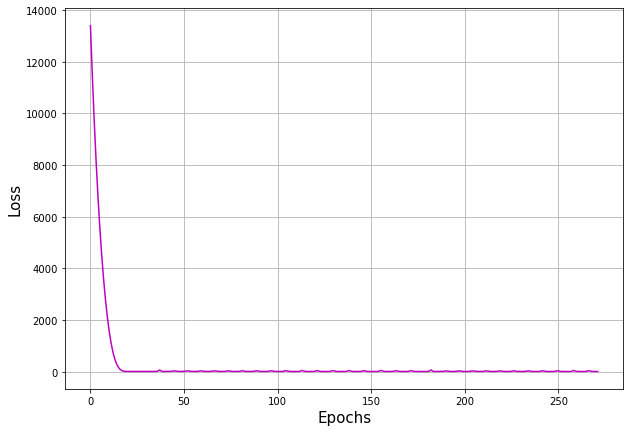

In [57]:
plot(np.arange(0,len(cost_history)),cost_history,'Epochs','Loss','')

In [50]:
len(cost_history) #Number Of iterations 


272

In [66]:
p1_=[p_history[i][0] for i in range(len(p_history)) ]
p2_=[p_history[i][1] for i in range(len(p_history)) ]
p3_=[p_history[i][2] for i in range(len(p_history)) ]
p4_=[p_history[i][3] for i in range(len(p_history)) ]


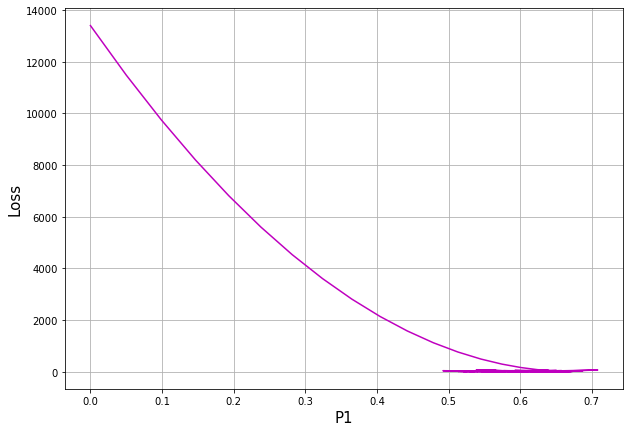

In [67]:
plot(p1_,cost_history,'P1','Loss','')

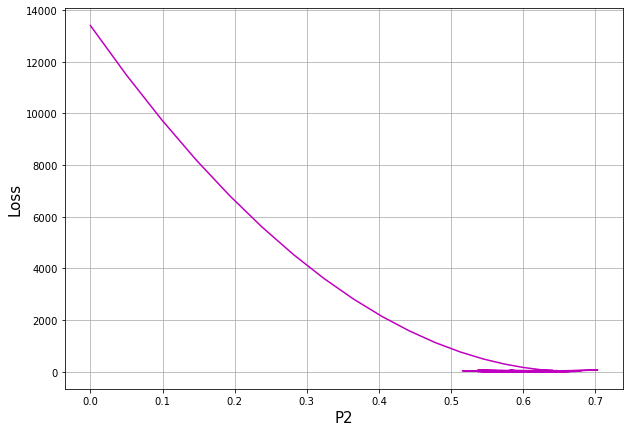

In [60]:
plot(p2_,cost_history,'P2','Loss','')

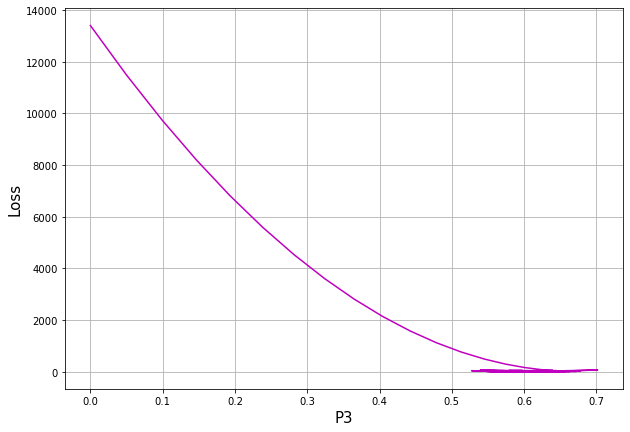

In [61]:
plot(p3_,cost_history,'P3','Loss','')

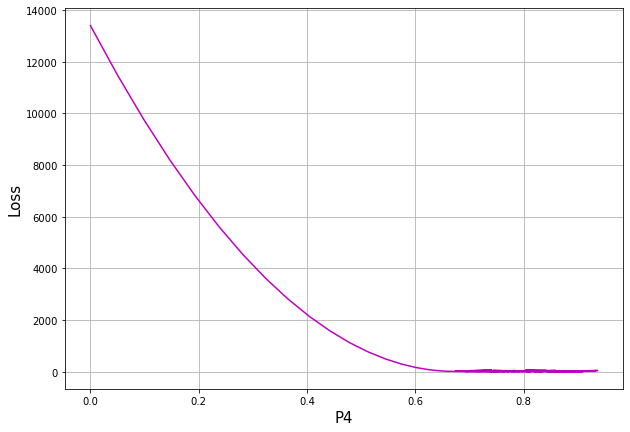

In [62]:
plot(p4_,cost_history,'P4','Loss','')

# Repeating of Task-1 using BFGS optimizer instead of Adam.


In [30]:
def Hypothesis(X,w):
    H=  X @ w 
    return H


def J(X,y,w):
    return ( 1 / (2*m) ) * np.sum ((Hypothesis(X,w) - y )**2)

def Dj(X,y,w):
       return ( 1 / m ) *(X.T @ (Hypothesis(X,w) - y ) )

def DDj(X):
    return ( 1 / m )*(X.T @ X)

In [37]:
def MV_BFGS(X,y,xp,xc,epochs,alpha,eps,Df,J):
    
    B_inv=np.eye(X.shape[1])
    Thetas=[]
    
    gradc=Df(X,y,xc)
    gradp=Df(X,y,xp)
    
    I=np.eye(X.shape[1])
    loss_hist=[]
    
    for i in range (epochs):
        loss=J(X,y,xc)
        loss_hist.append(loss)
        xk=xc-xp
        grad=gradc-gradp
        B_inv= ((I - (xk @ grad.T ) / (grad.T @ xk )) @B_inv @ (I - (grad @ xk.T) / (grad.T @ xk ))) + (( xk @ xk.T) /(grad.T @ xk ))
        
        xp=xc
        update =(B_inv)  @ (Df(X,y,xc) )
        
        xc= xc - (alpha * update)
        gradc=Df(X,y,xc)
        gradp=Df(X,y,xp)
        Thetas.append(xc)    
        if abs(np.linalg.norm(Df(X,y,xc))<eps):
            break
    return (i+1) ,xc ,Df(X,y,xc),loss_hist,Thetas

In [38]:
xc=np.array([[0.1],[0.1],[0.1],[0.1]])
xp=np.array([[0],[0],[0],[0]])

epochs=500
alpha=1
eps=0.001

iters,xc,grad,loss_hist,Thetas=MV_BFGS(X,y,xp,xc,epochs,alpha,eps,Dj,J)

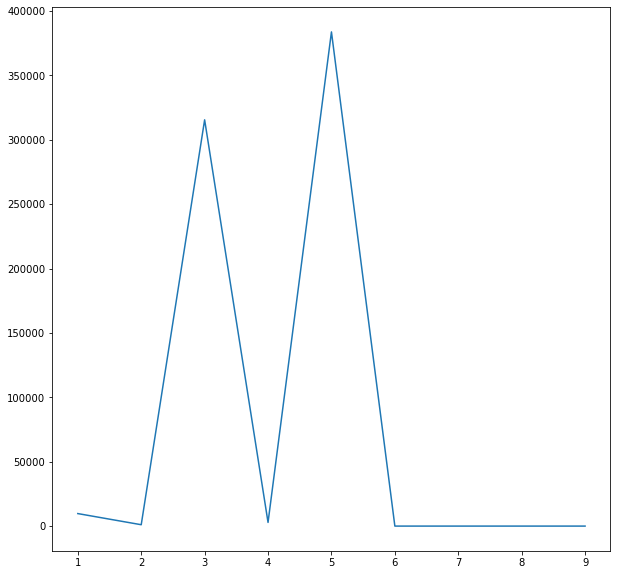

In [45]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,iters+1),loss_hist)